## Identifying and Removing Outliers

In [1]:
# import numpy as np
# import pandas as pd
# import scipy.stats as stats
# import seaborn as sns
# import matplotlib.pyplot as plt

# %matplotlib inline
# from IPython.display import display

# from sklearn.preprocessing import StandardScaler
# import scipy.stats as st

# customers = pd.read_csv('Wholesale_customers_data.csv')
# customers.Region = customers.Region.astype('category')
# customers.Channel = customers.Channel.astype('category')
# customer_features = customers.select_dtypes([int])

# scaler = StandardScaler()
# customer_sc = scaler.fit_transform(customer_features)
# customer_sc_df = pd.DataFrame(customer_sc, columns=customer_features.columns)

# customer_log_df = np.log(1+customer_features)
# scaler.fit(customer_log_df)
# customer_log_sc = scaler.transform(customer_log_df)
# customer_log_sc_df = pd.DataFrame(customer_log_sc, columns=customer_features.columns)

# customer_box_cox_df = pd.DataFrame()
# for col in customer_features.columns:
#     box_cox_trans = st.boxcox(customer_features[col])[0]
#     customer_box_cox_df[col] = pd.Series(box_cox_trans)
    
# scaler.fit(customer_box_cox_df)
# customer_box_cox_sc = scaler.transform(customer_box_cox_df)
# customer_box_cox_sc_df = pd.DataFrame(customer_box_cox_sc, columns=customer_features.columns)

In [5]:
%run load_data.py

To identify outliers in the data, we will use what is [the Tukey Method](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/). 

- leverages the Interquartile Range 
- isn’t dependent on distributional assumptions 
- ignores the mean and standard deviation
- making it resistant to being influenced by the extreme values in the range

**Tukey's Method:** look for points that are more than 1.5 times the Inter-quartile range above the third quartile or below the first quartile.

In [6]:
def feature_outliers(dataframe, col, param=1.5): #optional parameters are added to the end. 
    Q1 = np.percentile(dataframe[col], 25)
    Q3 = np.percentile(dataframe[col], 75)
    tukey_window = param*(Q3-Q1)
    less_than_Q1 = dataframe[col] < Q1 - tukey_window
    greater_than_Q3 = dataframe[col] > Q3 + tukey_window
    tukey_mask = (less_than_Q1 | greater_than_Q3)
    return dataframe[tukey_mask]

In [7]:
for col in customer_log_sc_df:
    print(col, feature_outliers(customer_log_sc_df, col).shape)

Fresh (16, 6)
Milk (4, 6)
Grocery (2, 6)
Frozen (10, 6)
Detergents_Paper (2, 6)
Delicatessen (14, 6)


What if we count the rows that show up as an outlier more than once?

In [8]:
from collections import Counter

In [9]:
def multiple_outliers(dataframe, count=2):
    raw_outliers = []
    for col in dataframe:
        outlier_df = feature_outliers(dataframe, col)
        raw_outliers += list(outlier_df.index)

    outlier_count = Counter(raw_outliers)
    outliers = [k for k,v in outlier_count.items() if v >= count]
    return outliers

In [10]:
multiple_outliers(customer_features)

[39,
 47,
 87,
 103,
 125,
 181,
 284,
 23,
 28,
 45,
 49,
 56,
 61,
 65,
 85,
 86,
 92,
 109,
 163,
 171,
 183,
 211,
 216,
 251,
 265,
 319,
 325,
 358,
 384,
 427,
 43,
 77,
 145,
 201,
 304,
 331,
 333,
 343,
 437,
 22,
 40]

In [11]:
len(multiple_outliers(customer_features))

41

In [12]:
len(multiple_outliers(customer_sc_df))

41

In [13]:
len(multiple_outliers(customer_log_sc_df))

5

In [14]:
len(multiple_outliers(customer_box_cox_sc_df))

2

In [15]:
customer_log_sc_df.shape

(440, 6)

/opt/conda/lib/python3.6/site-packages/seaborn/categorical.py:2171: UserWarning: The boxplot API has been changed. Attempting to adjust your arguments for the new API (which might not work). Please update your code. See the version 0.6 release notes for more info.
  warnings.warn(msg, UserWarning)


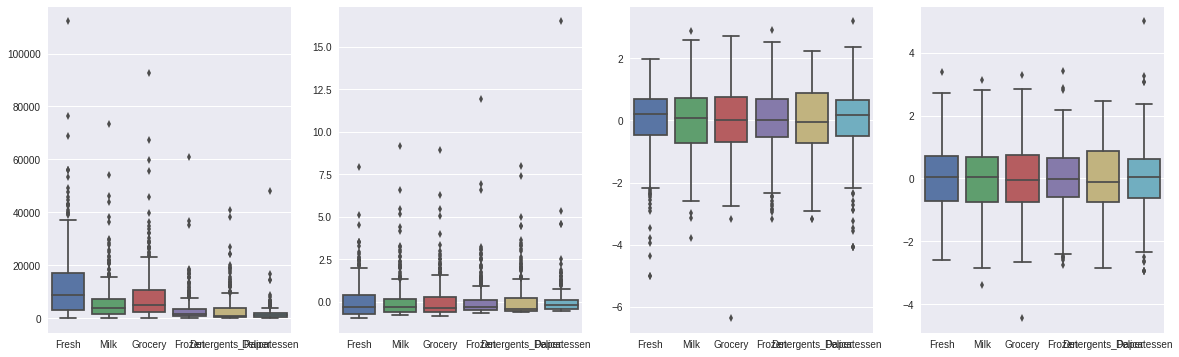

In [16]:
_, ax = plt.subplots(1,4,figsize=(20,6))

for i, df in enumerate([customer_features, customer_sc_df, customer_log_sc_df, customer_box_cox_sc_df]):
    sns.boxplot(df, ax=ax[i])

In [17]:
customer_features_outliers_removed = customer_features.drop(multiple_outliers(customer_features))
customer_sc_df_outliers_removed = customer_sc_df.drop(multiple_outliers(customer_sc_df))
customer_log_sc_df_outliers_removed = customer_log_sc_df.drop(multiple_outliers(customer_log_sc_df))
customer_box_cox_sc_df_outliers_removed = customer_box_cox_sc_df.drop(multiple_outliers(customer_box_cox_sc_df))

In [18]:
(customer_features_outliers_removed.shape,
 customer_sc_df_outliers_removed.shape,
 customer_log_sc_df_outliers_removed.shape,
 customer_box_cox_sc_df_outliers_removed.shape)

((399, 6), (399, 6), (435, 6), (438, 6))

In [19]:
customer_features_outliers_removed

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185
5,9413,8259,5126,666,1795,1451
6,12126,3199,6975,480,3140,545
7,7579,4956,9426,1669,3321,2566
8,5963,3648,6192,425,1716,750
9,6006,11093,18881,1159,7425,2098
